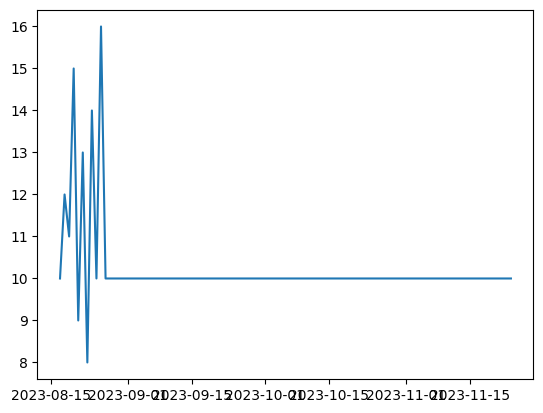

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

dates = pd.date_range('20230817', periods=100)
values = [10, 12, 11, 15, 9, 13, 8, 14, 10, 16] + [10] * 90

data = pd.DataFrame({'Date': dates, 'Value': values})

plt.plot(data['Date'], data['Value'])
plt.show()

In [3]:
model = ExponentialSmoothing(data['Value'], trend='add')
model = model.fit()

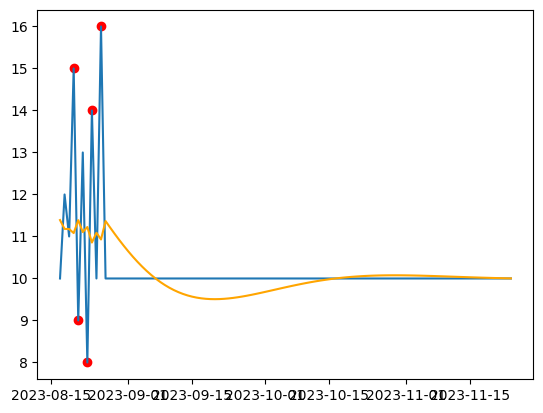

In [4]:
# 지수 평활법 모델을 통한 추세 계산
trend = model.predict(start=0, end=len(data['Value']) - 1)

# 위에서 계산된 추세와의 차이로 편차를 구함
deviation = data['Value'] - trend

# 이상치 기준
threshold = 2
outliers = abs(deviation) > threshold

plt.plot(data['Date'], data['Value'])
plt.plot(data['Date'], trend, color='orange')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red')

